In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fl_data = pd.read_csv("Florida, Florida, United States_concat.csv")

In [4]:
fl_data.dropna(axis=1,inplace=True)

In [5]:
fl_data['date'] = pd.to_datetime(fl_data[['Year', 'Month', 'Day', 'Hour', 'Minute']], format = '%Y/%M/%D %H%m')

In [6]:
fl_data['date']

0       2016-01-01 00:30:00
1       2016-01-01 01:30:00
2       2016-01-01 02:30:00
3       2016-01-01 03:30:00
4       2016-01-01 04:30:00
                ...        
43795   2020-12-31 19:30:00
43796   2020-12-31 20:30:00
43797   2020-12-31 21:30:00
43798   2020-12-31 22:30:00
43799   2020-12-31 23:30:00
Name: date, Length: 43800, dtype: datetime64[ns]

In [7]:
fl_data = fl_data.set_index('date')

In [8]:
y = fl_data['GHI'].resample('MS').mean()

In [9]:
y['2016':]

date
2016-01-01    131.090054
2016-02-01    183.508929
2016-03-01    206.518817
2016-04-01    273.225000
2016-05-01    270.418011
2016-06-01    256.377778
2016-07-01    274.641129
2016-08-01    237.724462
2016-09-01    210.743056
2016-10-01    172.580645
2016-11-01    166.450000
2016-12-01    136.815860
2017-01-01    160.314516
2017-02-01    195.593750
2017-03-01    227.072581
2017-04-01    251.831944
2017-05-01    292.243280
2017-06-01    229.675000
2017-07-01    257.235215
2017-08-01    248.518817
2017-09-01    207.440278
2017-10-01    179.133065
2017-11-01    167.701389
2017-12-01    149.706989
2018-01-01    139.896505
2018-02-01    198.622024
2018-03-01    255.061828
2018-04-01    270.277778
2018-05-01    198.470430
2018-06-01    242.005556
2018-07-01    250.206989
2018-08-01    253.549731
2018-09-01    230.620833
2018-10-01    210.793011
2018-11-01    164.998611
2018-12-01    147.567204
2019-01-01    152.263441
2019-02-01    181.044643
2019-03-01    214.567204
2019-04-01    259.10

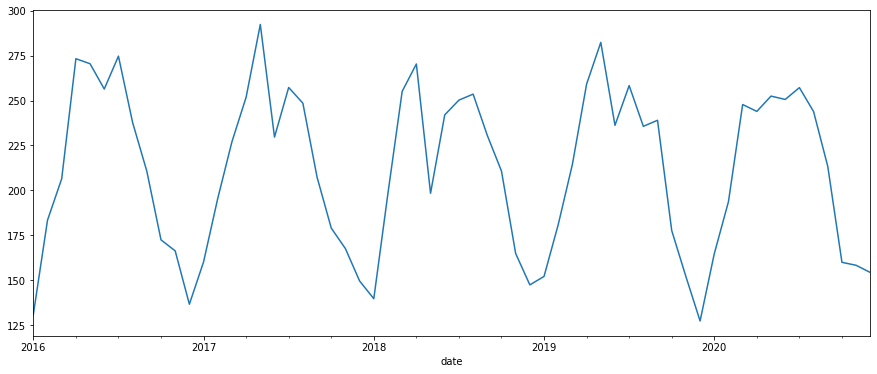

In [26]:
y.plot(figsize=(15, 6))
plt.show()

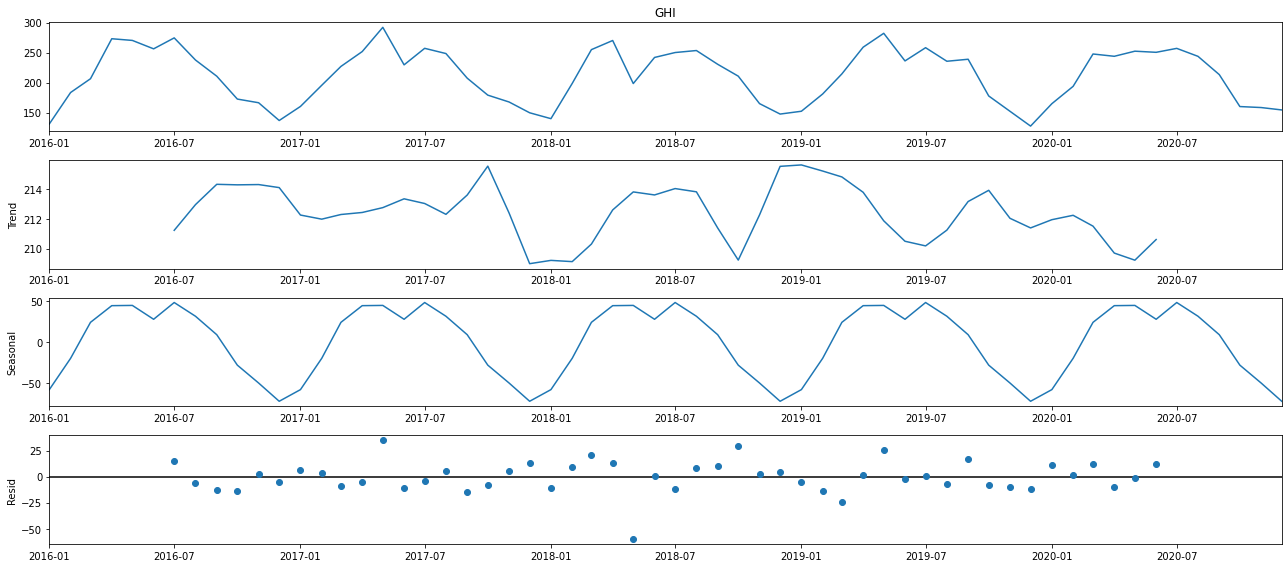

In [11]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [30]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
for param in pdq:
    
    for param_seasonal in seasonal_pdq:
        
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:804.6078609954748
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:606.5949326775914
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:440.3761402613957


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1118.511349292735
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:451.8119686698717
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:419.60602634253877
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:328.2409032604814


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1273.7611904247171
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:726.2685627061062
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:553.4027618565785
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:432.8766944292356


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1304.3049867869418
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:453.1212031720946
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:413.28456794485817
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:329.7576565547123


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1387.0280160581942
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:571.1206776610469
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:454.69956215816944
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:467.9587368790256


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1563.7082779933362
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:459.5454675299566
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:439.4247319773721
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:340.3438788170322


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1212.2806848064604
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:562.0382453712024
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:447.2187260254209
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:429.4605982073964


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1494.234434815622
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:442.508692850077
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:408.3068579812832
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:325.7526450631881


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1355.9877960156568
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:584.2064577852775
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:466.33080171015297
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:441.95748298467873


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1135.6531188049767
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:443.69825913819716
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:421.58592399668265
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:321.8542968434556


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1221.5908865902907
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:572.8204975228527
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:458.48022538927876
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:424.41951091974045


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:434.89120655163396
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:407.68378233955985
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:318.6832939800085


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1743.024503980218
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:570.5976699633038
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:456.4439365599454
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:458.6325983760887


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1354.6822564792321
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:449.4137500037369
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:434.3173196325762
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:329.126484163914


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1211.8166244731453
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:563.1764381066798
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:448.71055839129684
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:431.13454800637294


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1060.4016972367049
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:435.5662555233674
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:410.3039156949853
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.39910289847967
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:889.7035681774405


C:\Users\shiva\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1193      0.333      0.358      0.720      -0.533       0.772
ma.L1         -1.0000   3423.045     -0.000      1.000   -6710.045    6708.045
ar.S.L12      -0.6443      0.138     -4.670      0.000      -0.915      -0.374
sigma2       497.6920    1.7e+06      0.000      1.000   -3.34e+06    3.34e+06


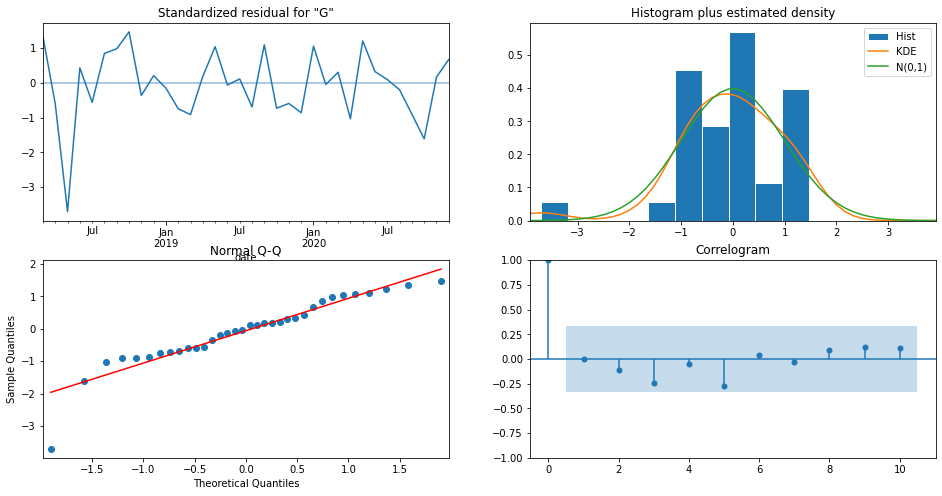

In [35]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

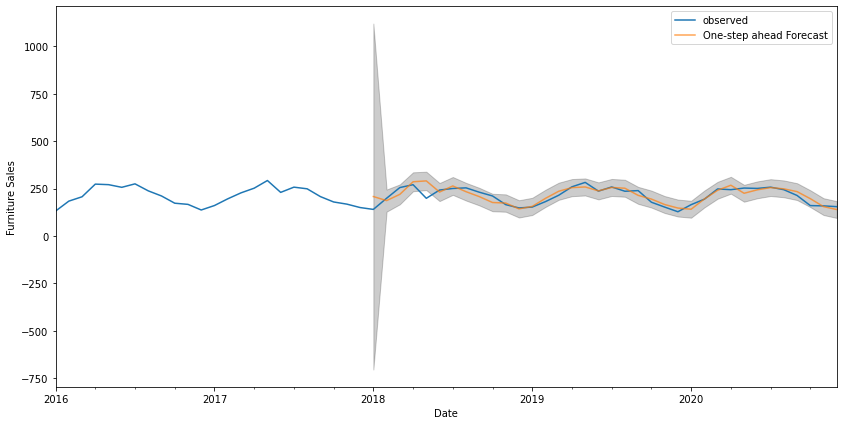

In [40]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()